In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

In [2]:
# load data
with open("Data/email_authors.pkl", "rb") as f:
    email_author = pickle.load(f)
    
with open("Data/word_data.pkl", "rb") as f:
    word_data = pickle.load(f)

In [3]:
df = pd.DataFrame([word_data, email_author])
dataset = df.T
dataset.rename(columns={0:"text", 1:"author"}, inplace=True)

In [4]:
dataset

,text,author
0,sbaile2 nonprivilegedpst susan pleas send the...,0
1,sbaile2 nonprivilegedpst 1 txu energi trade c...,0
2,sbaile2 nonprivilegedpst all here the second ...,0
3,sbaile2 nonprivilegedpst enron wholesal ser...,0
4,sbaile2 nonprivilegedpst origin messag from ...,0
...,...,...
17573,jtowns nonprivilegedpst i have a discount on ...,1
17574,judi townsend 62602pst i ask victor about the...,1
17575,judi townsend 62602pst photo of my woman on t...,1
17576,jtownsensf on the 8th tp2 sold vng 10000 dth ...,1


In [5]:
dataset.author.value_counts()

1    8801
0    8777
Name: author, dtype: int64

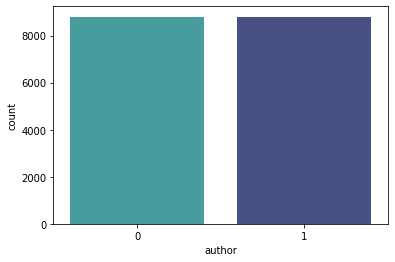

In [6]:
sns.countplot(x="author", data=dataset, palette="mako_r")

In [7]:
X = dataset.text
y = dataset.author

In [8]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed  = vectorizer.transform(features_test)

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train_transformed, labels_train)

features_train_transformed = selector.transform(features_train_transformed).toarray()
features_test_transformed  = selector.transform(features_test_transformed).toarray()

In [10]:
type(labels_train)

pandas.core.series.Series

In [11]:
labels_train

7459     0
9349     1
2141     0
11782    1
14654    1
        ..
13927    1
919      0
5699     0
10742    1
16921    1
Name: author, Length: 14062, dtype: object

In [12]:
labels_test = labels_test.astype(int)
labels_train = labels_train.astype(int)

In [13]:
type(labels_train)

pandas.core.series.Series

In [14]:
labels_train

7459     0
9349     1
2141     0
11782    1
14654    1
        ..
13927    1
919      0
5699     0
10742    1
16921    1
Name: author, Length: 14062, dtype: int32

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(features_train_transformed, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
pred = clf.predict(features_test_transformed)
acc = accuracy_score(pred, labels_test)
print(f"Accuracy: {round(acc*100,2)} %")

Accuracy: 97.41 %
